# Model 1 testing

## Introduction

This file will serve solely to try out the performance of different models in orther to choose which one is the best for the data (model 1).

Creating this file will help with keeping track of the results and the advancements of the proyect.

## Index of models tried

1. Linear Regression
2. Logistic Regression
3. Bagging (C & R)
4. Random Forest (C & R)
5. Boosting (R)
6. SVC and SVR
7. Pipelines with reduction of dimensionality

In [21]:
# Load the necessary modules
# Relative paths (make sure you are in src)
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries 
import numpy as np 
import pandas as pd 
import math
import scipy.stats as stats

# My code
from data_processing import get_path
from Models.RandomForest import Random_Forest_ensemble
from Models.BaggingEnsemble import Bagging_Ensemble
from Models.LinearRegressor import LinearRegressor
from Models.LogisticRegressor import LogisticRegressor
from Models.LinearRegressionVariants import LR_Relations, LR_ensemble
from Models.Boosting import Boosting_Regressor
from Models.SVR import SVR_manual
from utils import evaluate_classification_metrics, evaluate_regression_metrics, cross_validation, plot_residuals_color
from data_processing import standarize_numerical_variables

# Machine learning libraries 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor,StackingRegressor,GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,confusion_matrix, make_scorer
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.decomposition import KernelPCA, PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
from sklearn.datasets import make_regression
from sklearn.svm import SVR, SVC

# Parameters
import configparser
config = configparser.ConfigParser()
config.read('../configuration.ini')


['../configuration.ini']

In [22]:
# Import data from relative path for train
file = get_path('created_files','train',parent_dir)
data = pd.read_csv(file,sep = ',')
X_train_p = data.drop(columns=['T3']).reset_index(drop=True)
y_train_p = data['T3'].reset_index(drop=True)

# Do the train/ test split and standarize AFTER so there is no data leakage
X_train, X_test, y_train_unstd, y_test_unstd = train_test_split(X_train_p,y_train_p,test_size=0.2)
X_train, X_test, y_train,y_test,scaler_y = standarize_numerical_variables(X_train, X_test, y_train_unstd, y_test_unstd,1)

# Import data from relative path for test
file_test = get_path('created_files','test',parent_dir)
data_test = pd.read_csv(file_test,sep = ',')
X_test_final = data.drop(columns=['T3']).reset_index(drop=True)
y_test_final = data['T3'].reset_index(drop=True)

# Check dimensions
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(668, 42)
(668,)
(167, 42)
(167,)


In [13]:
# X_important_features_train = X_train[['T2', 'T1', 'Medu', 'Pedu', 'SalAm', 'suspensos', 'AlcFin', 'AlcSem', 'TiempoEstudio', 'edad', 'faltas', 'TiempoLib', 'TiempoViaje','salud','extras_si','Mtrab_docencia','Ptrab_docencia' ]]
# X_important_features_test = X_test[['T2', 'T1', 'Medu', 'Pedu', 'SalAm', 'suspensos', 'AlcFin', 'AlcSem', 'TiempoEstudio', 'edad', 'faltas', 'TiempoLib', 'TiempoViaje','salud','extras_si','Mtrab_docencia','Ptrab_docencia' ]]

### 1. Linear Regression

We can see that we get very decent results using Linear Regression

In [23]:
LinRegSK = LinearRegression()
LinRegSK.fit(X_train,y_train)

# print(LinRegSK.coef_)

predictions = LinRegSK.predict(X_test)
predictions_train = LinRegSK.predict(X_train)
# print(predictions)

a,b = cross_validation(LinRegSK,X_train,y_train,10)
print('Score CV: ',a)
print('std CV: ',b)
print('Internal score: ',LinRegSK.score(X_test,y_test))
print(evaluate_regression_metrics(y_test,y_train,predictions,predictions_train))
#print(cross_validation(LinRegSK,X_train,y_train,-1))

Score CV:  0.8286372285238925
std CV:  0.0476022910354001
Internal score:  0.8315465847047063
{'Mean Absolute Error:': 0.2633547374323586, 'Mean Squared Error:': 0.1717707431495185, 'R² Score Test:': 0.830777787047424, 'R² Score Train:': 0.8522675432137288}


Let's study the behaviour of the variables to see if they behave with each other in a linear form

c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


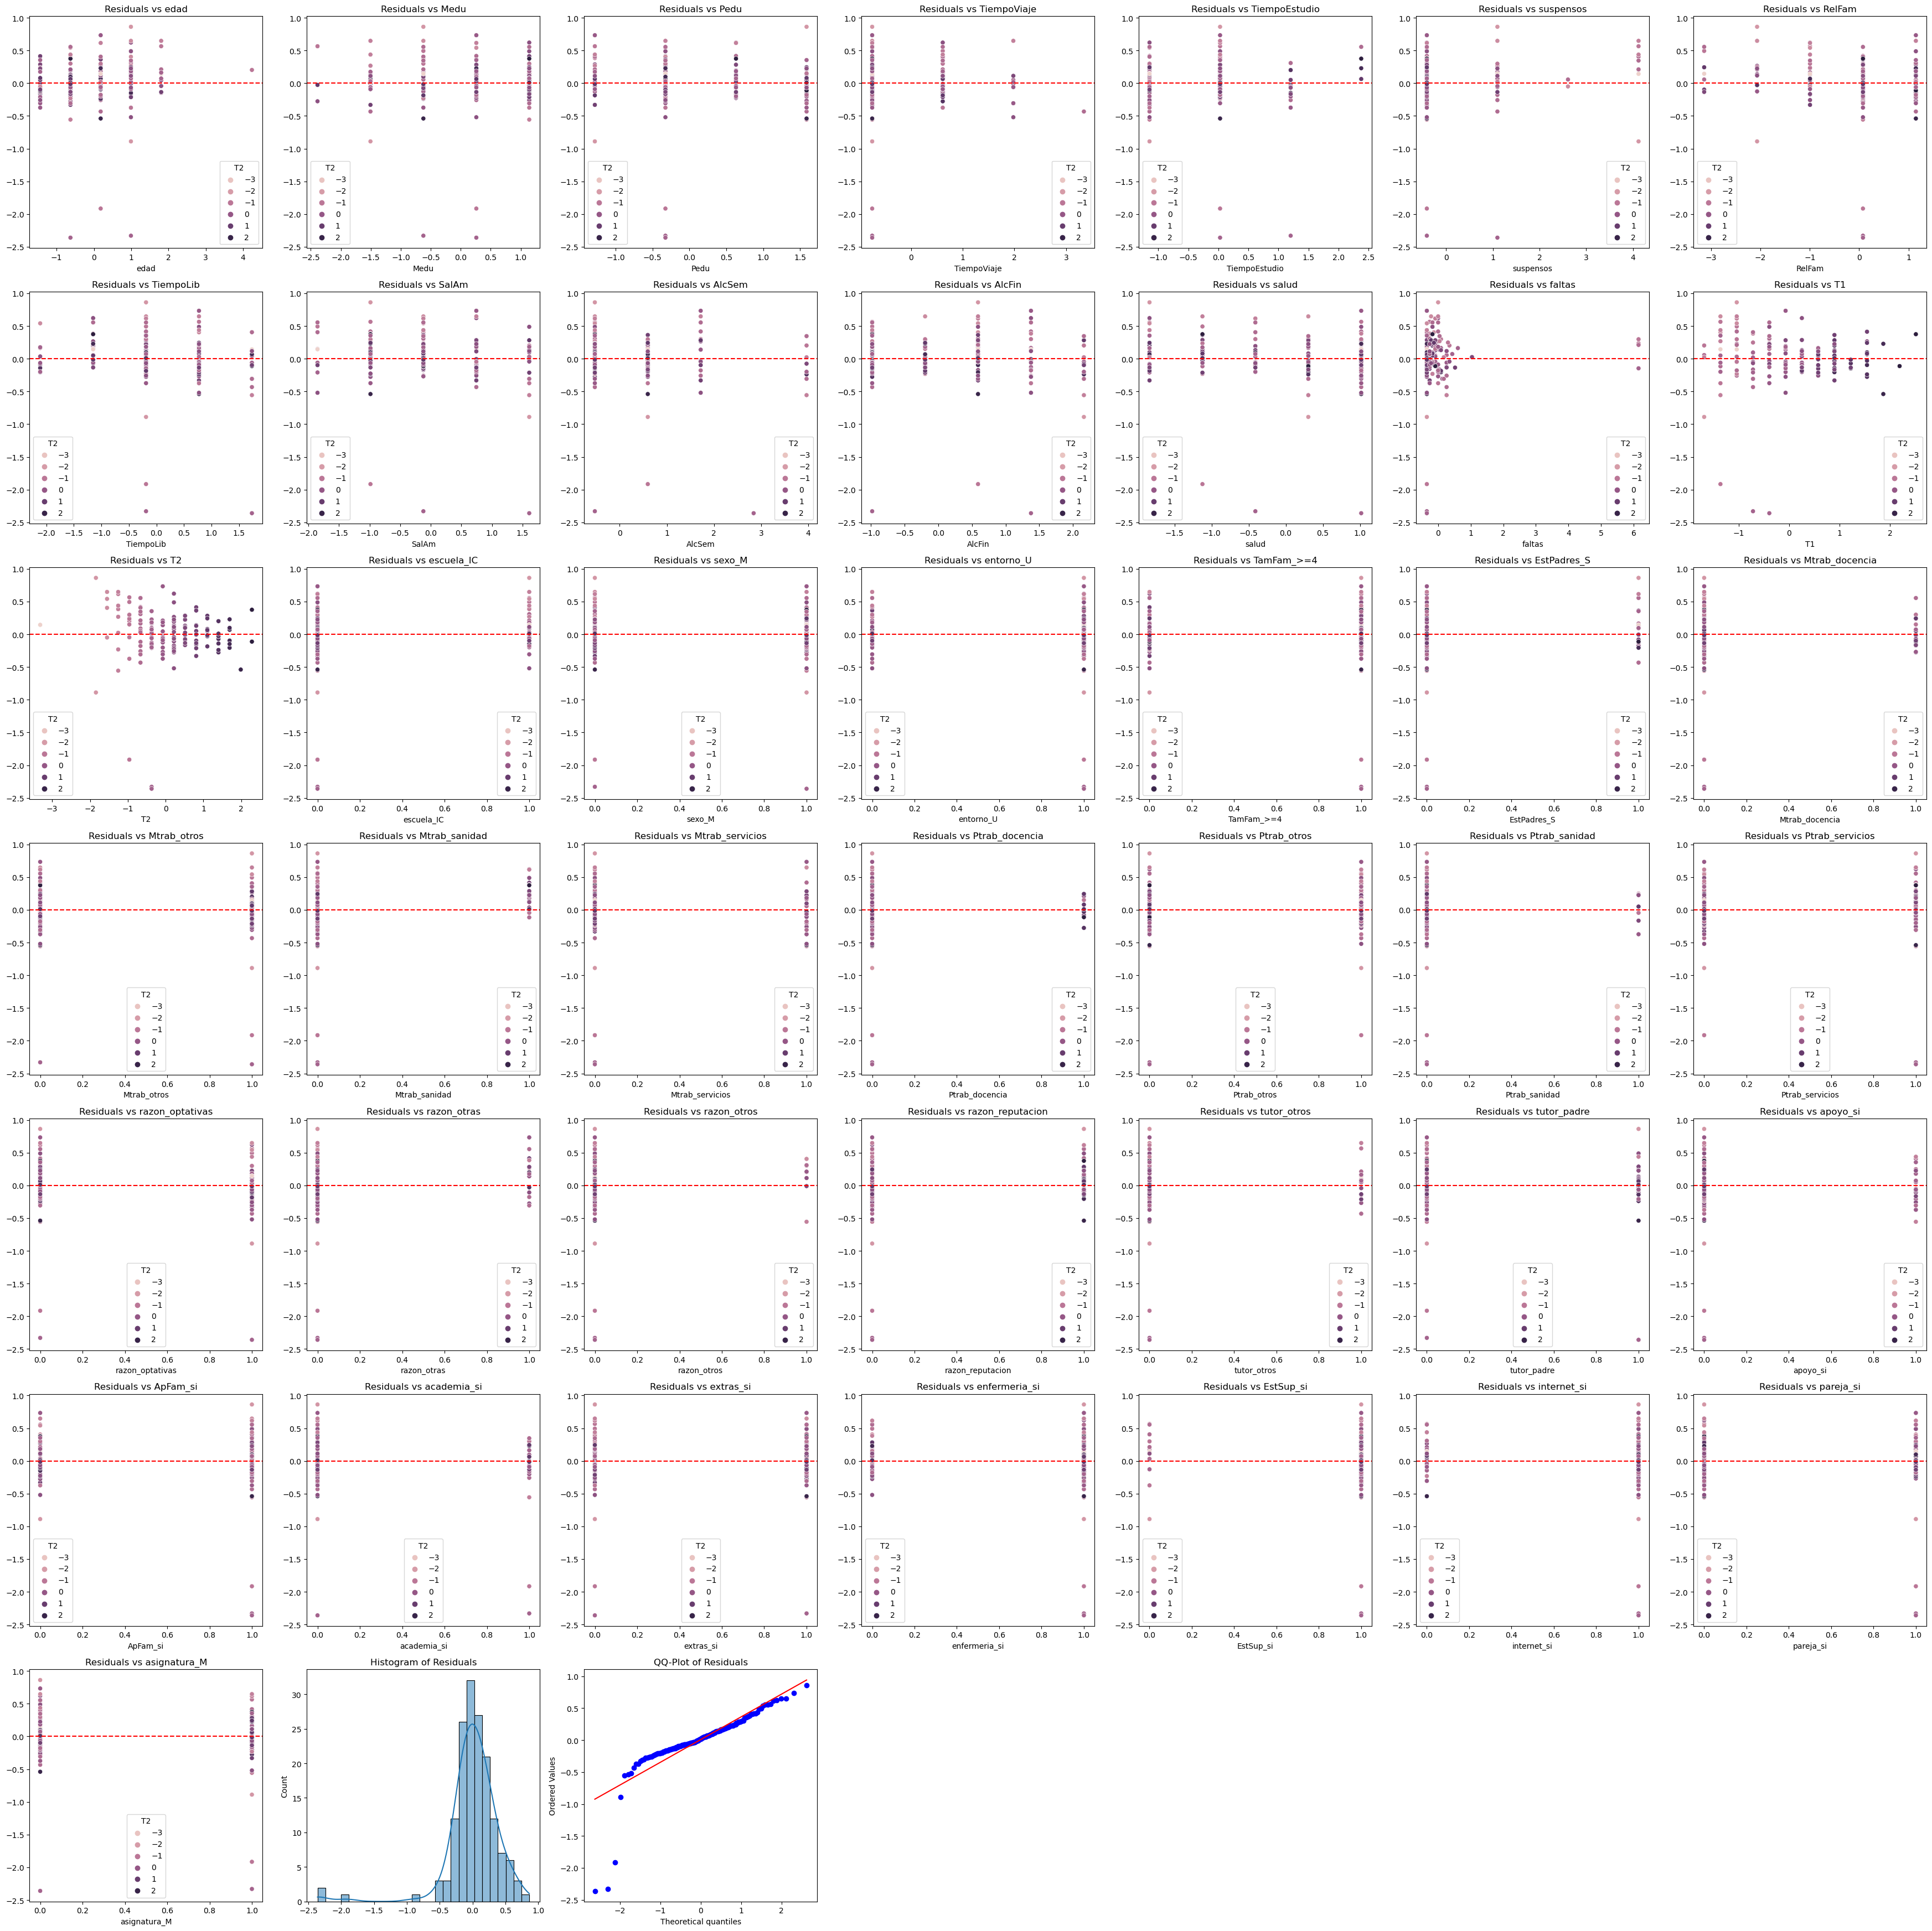

In [ ]:
plot_residuals_color(X_test,y_test,predictions,X_test.columns,'T2')

In [11]:
LinReg = LinearRegressor() # My regressor
LinReg.fit(X_train,y_train) # It has worse permormance using gradient_descent (makes sense)

# print(LinReg.coefficients) # It has smaller coefficients than sklearn 

predictions = LinReg.predict(X_test)
predictions_t = LinReg.predict(X_train)
# print(predictions)

a,b = cross_validation(LinReg,X_train,y_train,10)
print('Score CV: ',a)
print('std CV: ',b)
print('Internal score: ',LinReg.score(X_test,y_test))
print(evaluate_regression_metrics(y_test,y_train, predictions,predictions_t))


Score CV:  0.8122952998476853
std CV:  0.05009245017536867
Internal score:  0.8754332114275089
{'Mean Absolute Error:': 0.20570961355100886, 'Mean Squared Error:': 0.09250788848115815, 'R² Score Test:': 0.8787893439468151, 'R² Score Train:': 0.843737140760404}


Now I will try some variants (created by me) of the Linear Regression to see if i can boost its performance a little bit more

In [8]:

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
# Here I write relationships between variables manually, based on the previous plot
X_train_copy['n'] = X_train['escuela_IC']*X_train['entorno_U']
X_test_copy['n'] = X_test['escuela_IC']*X_test['entorno_U']

X_train_copy['t'] = X_train['T1']*X_train['T2']
X_test_copy['t'] = X_test['T1']*X_test['T2']

X_train_copy['m'] = X_train['Medu']*X_train['Pedu']
X_test_copy['m'] = X_test['Medu']*X_test['Pedu']

X_train_copy['f'] = X_train['faltas']*X_train['salud']
X_test_copy['f'] = X_test['faltas']*X_test['salud']

LinRegSK_R = LinearRegression()
LinRegSK_R.fit(X_train_copy,y_train)

predictions = LinRegSK_R.predict(X_test_copy)
predictions_train = LinRegSK_R.predict(X_train_copy)

a,b = cross_validation(LinRegSK_R,X_train_copy,y_train,10)
print('Score CV: ',a)
print('std CV: ',b)
print('Internal score: ',LinRegSK_R.score(X_test_copy,y_test))
print(evaluate_regression_metrics(y_test,y_train,predictions,predictions_train))


Score CV:  0.8135429241837869
std CV:  0.04868166625722327
Internal score:  0.878541235049433
{'Mean Absolute Error:': 0.20350895017576628, 'Mean Squared Error:': 0.09026366953767845, 'R² Score Test:': 0.8817298850718195, 'R² Score Train:': 0.8460449284796915}


Since I saw that taking into account some relations boosts the performance, I created a class designed for this specifically

In [9]:
LR_Rel = LR_Relations()
LR_Rel.fit(X_train,X_test,y_train)
predictions,score = LR_Rel.predict(y_test,y_train)
print(score)

{'Mean Absolute Error:': 0.20033677395786986, 'Mean Squared Error:': 0.08887000065258245, 'R² Score Test:': 0.8835559727996547, 'R² Score Train:': 0.845666429755758}


In [4]:
# Ensemble of linear regressors using OOB samples (increases permormace a little bit)

LR_E = LR_ensemble()
LR_E.fit(X_train,X_test,y_train)
predictions = LR_E.predict()
print(LR_E.score(y_test,y_train))

{'Mean Absolute Error:': 0.24974451805356732, 'Mean Squared Error:': 0.1624641364366311, 'R² Score Test:': 0.8078852720573833, 'R² Score Train:': 0.856767990264881}


In [5]:
base_models = [
    #('lr', LinearRegression()),
    ('lasso', LassoCV(cv=5)),
    ('RF', RandomForestRegressor(random_state=42)),
    #('svm', SVR(C=1.0, epsilon=0.2))
]

meta_model = LinearRegression()
stack = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5, passthrough=True)
stack.fit(X_train, y_train_unstd)
y_pred = stack.predict(X_test)
y_pred_t = stack.predict(X_train)
print(evaluate_regression_metrics(y_test_unstd,y_train_unstd,y_pred,y_pred_t))

# Good results but potentially very overfitted


{'Mean Absolute Error:': 1.0640796303073476, 'Mean Squared Error:': 2.7250734983157603, 'R² Score Test:': 0.8032037194846803, 'R² Score Train:': 0.9529673735087889}



###  2. Logistic Regression

In [13]:

# print(y_train_unstd.nunique())
# print(y_test_unstd.nunique())

LogReg = LogisticRegressor()
LogReg.fit(X_train,y_train_unstd)

predictions = LogReg.predict(X_test)
predictions_t = LogReg.predict(X_train)
#print(predictions)


a,b = cross_validation(LogReg,X_train,y_train_unstd,10)
print('Score CV: ',a)
print('std CV: ',b)
print('Internal score: ',LogReg.score(X_test,y_test_unstd))
print(evaluate_classification_metrics(y_test_unstd, y_train_unstd,predictions,predictions_t))


Score CV:  0.2393939393939394
std CV:  0.05326786615529378
Internal score:  0.2634730538922156
{'Accuracy Test': 0.23353293413173654, 'Precision': 0.17497715192325972, 'Recall': 0.23353293413173654, 'F1 Score': 0.1882122312573857, 'Accuracy Train': 0.36976047904191617}


In [14]:

# To classify we use unstandarized target variable
LogRegSK = LogisticRegression()
LogRegSK.fit(X_train,y_train_unstd)

predictions = LogRegSK.predict(X_test)
predictions_t = LogRegSK.predict(X_train)
#print(predictions)

a,b = cross_validation(LogRegSK,X_train,y_train_unstd,10)
print('Score CV: ',a)
print('std CV: ',b)
print('Internal score: ',LogRegSK.score(X_test,y_test_unstd))
print(evaluate_classification_metrics(y_test_unstd, y_train_unstd,predictions,predictions_t))


c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Score CV:  0.30454545454545456
std CV:  0.047164795200828426
Internal score:  0.2934131736526946
{'Accuracy Test': 0.2694610778443114, 'Precision': 0.23814136433016317, 'Recall': 0.2694610778443114, 'F1 Score': 0.2461540725295389, 'Accuracy Train': 0.6107784431137725}


c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [15]:
C_values = np.logspace(-5, 5, num=11)  
weights_evolution = []    
accuracies = []           
num_iterations = 1000      
learning_rate = 0.01       

for C in C_values:
    model = LogisticRegressor(learning_rate = learning_rate, penalty = 'lasso')  
    model.fit(X_train, y_train_unstd,  num_iterations = num_iterations, C = C)
    weights_evolution.append(model.weights)
    
    # Predict and calculate accuracy in the test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_unstd, y_pred)
    accuracies.append(accuracy)
    if accuracy >= 0.7:
        print(C)
print(max(accuracies))

0.25149700598802394


In [ ]:
# Plotting the evolution of weights
plt.figure(figsize=(14, 6))

# Plot for the changes in the weights in terms of the regularization parameter
plt.subplot(1, 2, 1)
for feature_index in range(len(weights_evolution[0])):
    weight_trajectory = [weights[feature_index] for weights in weights_evolution]
    plt.plot(C_values, weight_trajectory, label=f'Feature {feature_index + 1}')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Weight Magnitude')
plt.title('Evolution of Weights with Respect to C')
plt.legend(loc='best')
plt.grid(True)

max_accuracy = max(accuracies)
optimum_C_values = [C_values[i] for i in range(11) if accuracies[i] >= max_accuracy ]
optimum_C = max(optimum_C_values)

print(f"The optimum value of C based on accuracy is: {optimum_C}")

# Plotting accuracy as a function of C
plt.subplot(1, 2, 2)
plt.plot(C_values, accuracies, marker='o', linestyle='-')
plt.plot(optimum_C, max_accuracy, 'ro', markersize=10, label='Optimum C')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Respect to C')
plt.grid(True)

plt.tight_layout()
plt.show()

## Tree Ensembles

#### Bagging

I'll try to see the best parameters using cross-validation

In [18]:
max_samples = 0.8
tipo = 'clas'
for n_estimators in [6,10,14,20,30,50,100]:
    print(n_estimators)

    bagging = Bagging_Ensemble(tipo = 'clas') 
    bagging.fit(X_train,X_test, y_train_unstd,n_estimators=n_estimators,max_samples=max_samples)
    bagging_pred = bagging.predict()
    print(f'Score Manual implementation: {bagging.score(y_test_unstd,y_train_unstd)}')

    bagging = BaggingClassifier(random_state=0,n_estimators=n_estimators) 
    bagging.fit(X_train, y_train_unstd)
    bagging_pred = bagging.predict(X_test)
    bagging_pred_train = bagging.predict(X_train)
    print(f'Score Sklearn implementation: {evaluate_classification_metrics(y_test_unstd,y_train_unstd,bagging_pred,bagging_pred_train)}')

6
Score Manual implementation: {'Accuracy Test': 0.3772455089820359, 'Precision': 0.3781269414740595, 'Recall': 0.3772455089820359, 'F1 Score': 0.3686070620202357, 'Accuracy Train': 0.9041916167664671}
Score Sklearn implementation: {'Accuracy Test': 0.38922155688622756, 'Precision': 0.3684480303269095, 'Recall': 0.38922155688622756, 'F1 Score': 0.37149518972554285, 'Accuracy Train': 0.9595808383233533}
10
Score Manual implementation: {'Accuracy Test': 0.48502994011976047, 'Precision': 0.48579918085906115, 'Recall': 0.48502994011976047, 'F1 Score': 0.4740164372690502, 'Accuracy Train': 0.9535928143712575}
Score Sklearn implementation: {'Accuracy Test': 0.41916167664670656, 'Precision': 0.3937492480905654, 'Recall': 0.41916167664670656, 'F1 Score': 0.3967008625947698, 'Accuracy Train': 0.9850299401197605}
14
Score Manual implementation: {'Accuracy Test': 0.4251497005988024, 'Precision': 0.4221742942291703, 'Recall': 0.4251497005988024, 'F1 Score': 0.4152147255728225, 'Accuracy Train': 0.

In [ ]:

n_est = [6,10,14,20,30,50,100,200]

for n_estimators in n_est:
    print(n_estimators)
    max_samples = 0.8

    bagging = Bagging_Ensemble(tipo = 'reg') 
    bagging.fit(X_train,X_test, y_train_unstd,n_estimators=n_estimators,max_samples=max_samples)
    bagging_pred = bagging.predict()
    print(f'Score Manual implementation: {bagging.score(y_test_unstd,y_train_unstd)}')

    bagging = BaggingRegressor(random_state=0,n_estimators=n_estimators) 
    bagging.fit(X_train, y_train_unstd)
    bagging_pred = bagging.predict(X_test)
    bagging_pred_train = bagging.predict(X_train)
    score = evaluate_regression_metrics(y_test_unstd,y_train_unstd,bagging_pred,bagging_pred_train)
    print(f'Score Sklearn implementation: {score}')


6
Score Manual implementation: {'Mean Absolute Error:': 1.0518962075848304, 'Mean Squared Error:': 2.839321357285429, 'R² Score Test:': 0.7532075256082611, 'R² Score Train:': 0.9635607734815119}
Score Sklearn implementation: {'Mean Absolute Error:': 0.9770459081836328, 'Mean Squared Error:': 2.367764471057885, 'R² Score Test:': 0.7941950279457292, 'R² Score Train:': 0.9734587525157089}
10
Score Manual implementation: {'Mean Absolute Error:': 0.9526946107784432, 'Mean Squared Error:': 2.8364670658682636, 'R² Score Test:': 0.7534556192732031, 'R² Score Train:': 0.9677000349952499}
Score Sklearn implementation: {'Mean Absolute Error:': 0.9640718562874252, 'Mean Squared Error:': 2.3774850299401193, 'R² Score Test:': 0.7933501215483388, 'R² Score Train:': 0.9768712824132472}
14
Score Manual implementation: {'Mean Absolute Error:': 0.971770744225834, 'Mean Squared Error:': 2.7659171453012346, 'R² Score Test:': 0.7595877851233992, 'R² Score Train:': 0.9685841287670155}
Score Sklearn implement

The regressor has very good results, however, it might have a MAE that is worse than other models, but bagging with n_estimators = 30 will definitely be in the final decission.

#### Random Forest

In [20]:
max_samples = 0.8
max_features = 0.8

for n_estimators in [6,10,14,20,30,50,100]:
    print(n_estimators)

    rf = Random_Forest_ensemble(tipo = 'clas') 
    rf.fit(X_train,X_test, y_train_unstd,n_estimators=n_estimators,max_samples=max_samples,max_features=max_features)
    rf_pred = rf.predict()
    print(f'Score Manual implementation: {rf.score(y_test_unstd,y_train_unstd)}')


    rf = RandomForestClassifier(random_state=0,n_estimators=n_estimators,max_features=max_features) 
    rf.fit(X_train, y_train_unstd)
    rf_pred = rf.predict(X_test)
    rf_pred_train = rf.predict(X_train)
    print(f'Score Sklearn implementation: {evaluate_classification_metrics(y_test_unstd,y_train_unstd,rf_pred,rf_pred_train)}')

6
Score Manual implementation: {'Accuracy Test': 0.40718562874251496, 'Precision': 0.4189651001028246, 'Recall': 0.40718562874251496, 'F1 Score': 0.4022625910465958, 'Accuracy Train': 0.9146706586826348}
Score Sklearn implementation: {'Accuracy Test': 0.4311377245508982, 'Precision': 0.4344518527310837, 'Recall': 0.4311377245508982, 'F1 Score': 0.4227017825820221, 'Accuracy Train': 0.9565868263473054}
10
Score Manual implementation: {'Accuracy Test': 0.46107784431137727, 'Precision': 0.45389004048925585, 'Recall': 0.46107784431137727, 'F1 Score': 0.44311055102104574, 'Accuracy Train': 0.9595808383233533}
Score Sklearn implementation: {'Accuracy Test': 0.4491017964071856, 'Precision': 0.4469979621177225, 'Recall': 0.4491017964071856, 'F1 Score': 0.439717543194481, 'Accuracy Train': 0.9790419161676647}
14
Score Manual implementation: {'Accuracy Test': 0.437125748502994, 'Precision': 0.43186688732837814, 'Recall': 0.437125748502994, 'F1 Score': 0.42163858918910835, 'Accuracy Train': 0.977

In [4]:
max_samples = 0.8
max_features = 0.8

for n_estimators in [6,10,14,20,30,50,100]:
    print(n_estimators)

    rf = Random_Forest_ensemble(tipo = 'reg') 
    rf.fit(X_train,X_test, y_train_unstd,n_estimators=n_estimators,max_samples=max_samples,max_features=max_features)
    rf_pred = rf.predict()
    print(f'Score Manual implementation: {rf.score(y_test_unstd,y_train_unstd)}')


    rf = RandomForestRegressor(random_state=0,n_estimators=n_estimators,max_features=max_features) 
    rf.fit(X_train, y_train_unstd)
    rf_pred = rf.predict(X_test)
    rf_pred_train = rf.predict(X_train)
    print(f'Score Sklearn implementation: {evaluate_regression_metrics(y_test_unstd,y_train_unstd,rf_pred,rf_pred_train)}')

    

6
Score Manual implementation: {'Mean Absolute Error:': 0.9520958083832335, 'Mean Squared Error:': 2.189620758483034, 'R² Score Test:': 0.8841114105337736, 'R² Score Train:': 0.9520058487654844}
Score Sklearn implementation: {'Mean Absolute Error:': 0.9870259481037925, 'Mean Squared Error:': 2.582002661343978, 'R² Score Test:': 0.8633440767028083, 'R² Score Train:': 0.9665823980361625}
10
Score Manual implementation: {'Mean Absolute Error:': 0.962874251497006, 'Mean Squared Error:': 2.351976047904192, 'R² Score Test:': 0.8755185410103618, 'R² Score Train:': 0.9628667748229717}
Score Sklearn implementation: {'Mean Absolute Error:': 0.9497005988023952, 'Mean Squared Error:': 2.6519760479041916, 'R² Score Test:': 0.8596406421983528, 'R² Score Train:': 0.968440702648934}
14
Score Manual implementation: {'Mean Absolute Error:': 0.9277159965782718, 'Mean Squared Error:': 2.684803861664425, 'R² Score Test:': 0.8579031865146712, 'R² Score Train:': 0.9575320455445286}
Score Sklearn implementati

Random Forest also did a nice job (not the classificator though)

### Boosting

It is interesting to see that Boosting has a grater variation of results, doing cross validation will be specially important here.


In [24]:
max_samples = 0.8
max_features = 0.8

for n_estimators in [6, 10, 14, 20, 30, 50, 100]:
    print(n_estimators)

    gb = Boosting_Regressor(n_estimators=n_estimators)
    gb.fit(X_train, y_train_unstd)
    gb_pred = gb.predict(X_test)
    gb_pred_train = gb.predict(X_train)
    print(f'Score Manual implementation: {evaluate_regression_metrics(y_test_unstd, y_train_unstd, gb_pred, gb_pred_train)}')

    gb = GradientBoostingRegressor(n_estimators=n_estimators,max_features=max_features,subsample=max_samples,random_state=0)
    gb.fit(X_train, y_train_unstd)
    gb_pred = gb.predict(X_test)
    gb_pred_train = gb.predict(X_train)
    print(f'Score Sklearn implementation: {evaluate_regression_metrics(y_test_unstd, y_train_unstd, gb_pred, gb_pred_train)}')


6
Score Manual implementation: {'Mean Absolute Error:': 1.775034088398873, 'Mean Squared Error:': 6.386326537972004, 'R² Score Test:': 0.6015742549325522, 'R² Score Train:': 0.610718248373244}
Score Sklearn implementation: {'Mean Absolute Error:': 1.8046293730551517, 'Mean Squared Error:': 6.8383353620794205, 'R² Score Test:': 0.5733746394804982, 'R² Score Train:': 0.5927313039108313}
10
Score Manual implementation: {'Mean Absolute Error:': 1.3301394738017853, 'Mean Squared Error:': 3.8904260885700297, 'R² Score Test:': 0.7572867745249099, 'R² Score Train:': 0.7576453267598934}
Score Sklearn implementation: {'Mean Absolute Error:': 1.351125351422932, 'Mean Squared Error:': 3.954798514232409, 'R² Score Test:': 0.753270751932918, 'R² Score Train:': 0.7513178061090288}
14
Score Manual implementation: {'Mean Absolute Error:': 1.0919719845942246, 'Mean Squared Error:': 2.8116240108382953, 'R² Score Test:': 0.824590336133438, 'R² Score Train:': 0.8252007362042362}
Score Sklearn implementatio


## Support Vector Machines

Let's try now SVMs, both on clasiffication and regression (although we can probably guess by now that the classification is going to be lame).

I will directly use GridSearch to get the best parameters, and then i will fit my manual model with those.

#### 1. SVC (from sklearn):

In [22]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train_unstd)
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

a,b = cross_validation(best_model,X_train,y_train_unstd,10)
print('Score CV: ',a)
print('std CV: ',b)
print('Internal score: ',best_model.score(X_test,y_test_unstd))
print(evaluate_classification_metrics(y_test_unstd,y_train_unstd,y_pred,y_pred_train))


c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score found: 0.3682190551004377
Score CV:  0.35909090909090907
std CV:  0.0610024913309012
Internal score:  0.32934131736526945
{'Accuracy Test': 0.31137724550898205, 'Precision': 0.3155640798829653, 'Recall': 0.31137724550898205, 'F1 Score': 0.2959520893792127, 'Accuracy Train': 0.8023952095808383}


#### 2. SVR (from sklearn):

In [23]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train_unstd)
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

a,b = cross_validation(best_model,X_train,y_train_unstd,10)
print('Score CV: ',a)
print('std CV: ',b)
print('Internal score: ',best_model.score(X_test,y_test_unstd))
print(evaluate_regression_metrics(y_test_unstd,y_train_unstd,y_pred,y_pred_train))

Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best score found: 0.836327376734595
Score CV:  0.8368766484523965
std CV:  0.05183507267227036
Internal score:  0.8174752229048204
{'Mean Absolute Error:': 0.8536699299645847, 'Mean Squared Error:': 2.1108798018640558, 'R² Score Test:': 0.8165233223393796, 'R² Score Train:': 0.8421730663129775}


#### 3. SVR (my implementation):

In [28]:

manual_SVR = SVR_manual(C=1,gamma=0.1,kernel='linear')
manual_SVR.fit(X_train,y_train)

y_pred = manual_SVR.predict(X_test)
y_pred_train = manual_SVR.predict(X_train)
a,b = cross_validation(manual_SVR,X_train,y_train,10)
print('Score CV: ',a)
print('std CV: ',b)
print('Internal score: ',manual_SVR.score(X_test,y_test))
print(evaluate_regression_metrics(y_test,y_train,y_pred,y_pred_train))

Score CV:  0.5932312932743281
std CV:  0.09877867049631206
Internal score:  0.5080765351001639
{'Mean Absolute Error:': 0.4799625754015104, 'Mean Squared Error:': 0.3370356565537666, 'R² Score Test:': 0.5015486886955072, 'R² Score Train:': 0.5916208250655135}


#### 4. SVR combined with KernelPCA/ PCA

Good results but worse than just Linear Regression

In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    #('pca', PCA(n_components=0.95,svd_solver='full')),  # 95% of variance explained
    ('kpca', KernelPCA(n_components=40)),
    ('svc', SVR())
])

param_grid = {
    'svc__C': [100],
    'svc__gamma': ['scale'],
    'svc__kernel': ['linear']
}

grid_kp = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=0)
grid_kp.fit(X_train, y_train_unstd)

print("Best parameters:", grid_kp.best_params_)
print("Best CV score:", grid_kp.best_score_)
best_model = grid_kp.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

a,b = cross_validation(best_model,X_train,y_train_unstd,10)
print('Score CV: ',a)
print('std CV: ',b)
print('Internal score: ',best_model.score(X_test,y_test_unstd))
print(evaluate_regression_metrics(y_test_unstd,y_train_unstd,y_pred,y_pred_train))

Best parameters: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best CV score: 0.7975395051982795
Score CV:  0.798404496317256
std CV:  0.05108427950045003
Internal score:  0.8027825914261176
{'Mean Absolute Error:': 0.9480936077616829, 'Mean Squared Error:': 2.300178809290688, 'R² Score Test:': 0.8000695418179019, 'R² Score Train:': 0.8106207865408142}


## Pipelines with reduction of dimensionality

#### Linear Regression

Since this was the best simple model, let's see how it reacts to reducing the dimesnionality using non-linear methods such as KernelPCA and ISOMAP.

In [77]:
X = X_train_p.copy()
y = y_train_p.copy()

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('isomap', Isomap()),
    ('model', LinearRegression())  
])

param_grid = {
    'isomap__n_neighbors': [10, 15,20],       
    'isomap__n_components': [40,60,70],   
    'isomap__eigen_solver': ['auto','argpack','dense']
}

scoring = 'r2' if y.nunique() > 10 else 'accuracy'

# Grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring=scoring, n_jobs=-1)
grid.fit(X, y)

# Report
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

# # Predict on new data
# X_test_scaled = StandardScaler().fit_transform(X_test)  
# y_pred = grid.best_estimator_.predict(X_test)

c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 416,

Best parameters: {'isomap__eigen_solver': 'auto', 'isomap__n_components': 70, 'isomap__n_neighbors': 20}
Best CV score: 0.610629124392687


In [76]:
X = X_train_p.copy()
y = y_train_p.copy()

param_grid = {
    'kpca__kernel': ['rbf', 'poly', 'sigmoid','cosine'],
    'kpca__gamma': [0.01, 0.1, 1],
    'kpca__degree': [2, 3, 4],
    'kpca__eigen_solver': ['auto', 'dense', 'arpack', 'randomized'],
    'kpca__n_components': [20, 30,40]
}

pipe = Pipeline([
    ('scaler', StandardScaler()),  # This step safely separates train and test and standarizes using only the training data
    ('kpca', KernelPCA(n_components=2, fit_inverse_transform=False)),
    ('model', LinearRegression())  
])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy' if y.nunique() < 10 else 'r2')
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


#X_kpca = grid.best_estimator_.named_steps['kpca'].transform(StandardScaler().fit_transform(X))

Best parameters: {'kpca__degree': 3, 'kpca__eigen_solver': 'randomized', 'kpca__gamma': 0.01, 'kpca__kernel': 'poly', 'kpca__n_components': 40}
Best score: 0.8068280405121999


c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 416,

The best score was 0.8 with KernelPCA (0.61 using ISOMAP), so we can conclude reducing the dimesnionality took away important information that makes the model less accurate.

We see the **opposite** for Logistic Regression, the best score was 0.57, which much higher than the score we had before doing the reduction of dimensionality (0.26). I got this score by using the following params: {'kpca__degree': 2, 'kpca__eigen_solver': 'auto', 'kpca__gamma': 0.1, 'kpca__kernel': 'sigmoid', 'kpca__n_components': 30}

In [78]:
X = X_train_p.copy()
y = y_train_p.copy()

param_grid = {
    'kpca__kernel': ['rbf', 'poly', 'sigmoid','cosine'],
    'kpca__gamma': [0.01, 0.1, 1],
    'kpca__degree': [2, 3, 4],
    'kpca__eigen_solver': ['auto', 'dense', 'arpack', 'randomized'],
    'kpca__n_components': [20, 30]
}

pipe = Pipeline([
    ('scaler', StandardScaler()),  # This step safely separates train and test and standarizes using only the training data
    ('kpca', KernelPCA(n_components=2, fit_inverse_transform=False)),
    ('model', LogisticRegression())  
])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy' if y.nunique() < 10 else 'r2')
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

#X_kpca = grid.best_estimator_.named_steps['kpca'].transform(StandardScaler().fit_transform(X))

c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    

Best parameters: {'kpca__degree': 2, 'kpca__eigen_solver': 'auto', 'kpca__gamma': 0.1, 'kpca__kernel': 'sigmoid', 'kpca__n_components': 30}
Best score: 0.575394260302403


c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\luciaa_herraiz\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 416,